In [2]:
from functools import reduce

In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

In [4]:
# Imports
%pylab inline

from matplotlib import animation
import seaborn as sns
import pandas as pd

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [5]:
small_world = pd.read_hdf("/home/nikoleta/src/jobs/data/ch4_experiment/watts_strogatz.h5")

In [6]:
# fixing index of the data
small_world.index = range(len(small_world))

In [7]:
# tournament size for the rest
small_world['tournament_size']=small_world.groupby('tournament_id')['player_name'].transform('count').values

In [39]:
for i in range(1,4) :
    # get the nodes
    players = data.tournament_size[data.tournament_id==i].values[0]
    G = nx.Graph()
    G.add_nodes_from(range(players))

    # get the edges
    edges = []
    for j in data.index[data.tournament_id==i]:
        neighbors = data.neighbors[data.tournament_id==i][j].split("|")
        neighbors = map(int, neighbors)
        edges.append([tuple((data.player_index[data.tournament_id==i][j], k)) for k in neighbors])
    edges = reduce(lambda x,y: x+y,edges)
    G.add_edges_from(edges)
    
    print(G.nodes(), G.edges())

[0, 1, 2] [(0, 1), (0, 2), (1, 2)]
[0, 1, 2] [(0, 1), (0, 2), (1, 2)]
[0, 1, 2] [(0, 1), (0, 2), (1, 2)]


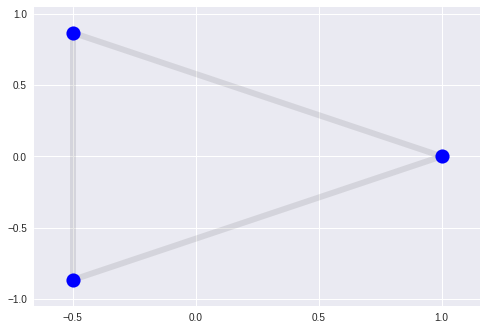

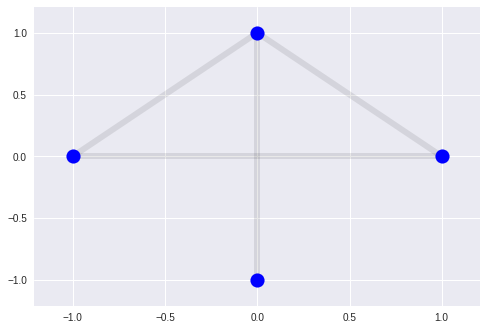

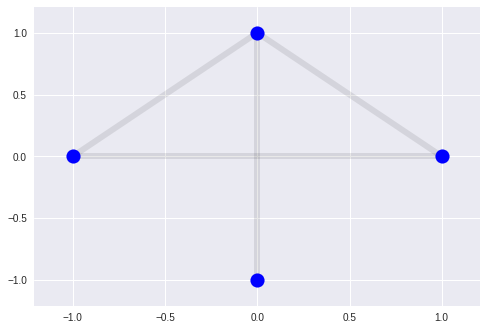

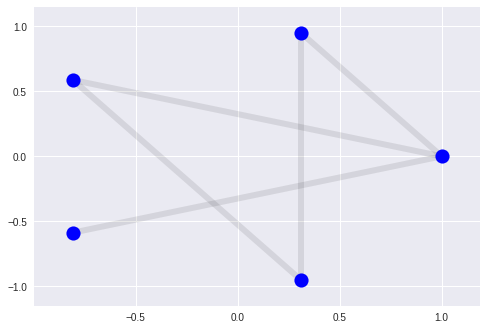

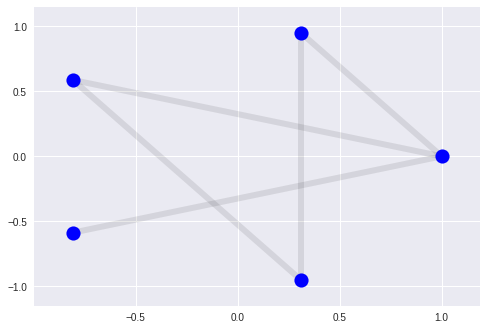

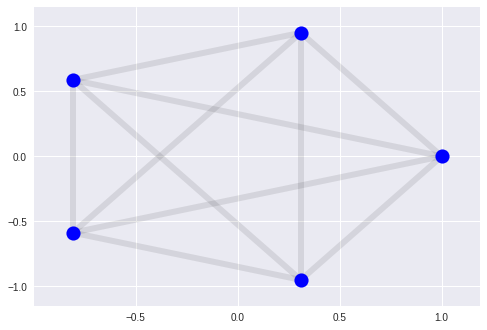

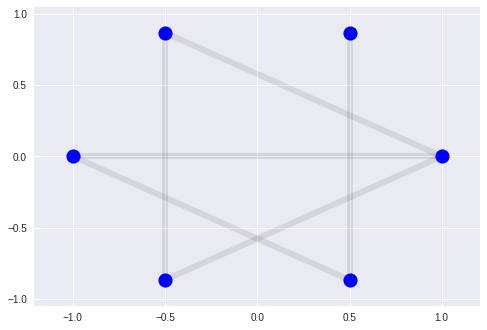

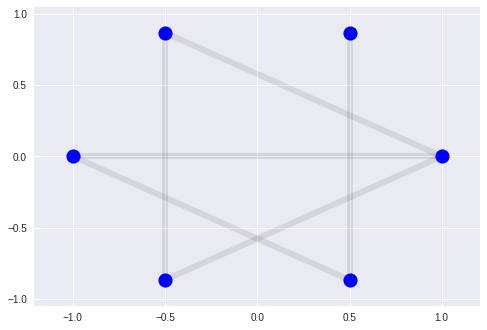

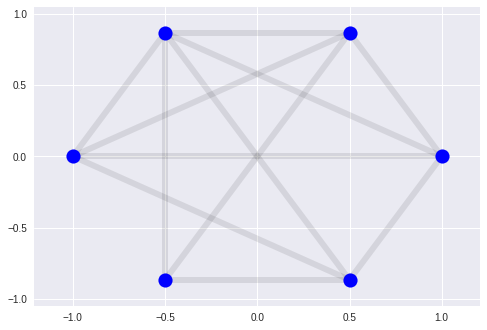

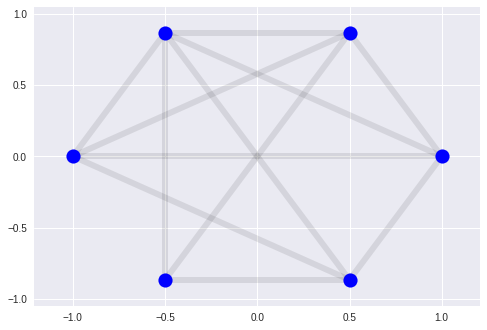

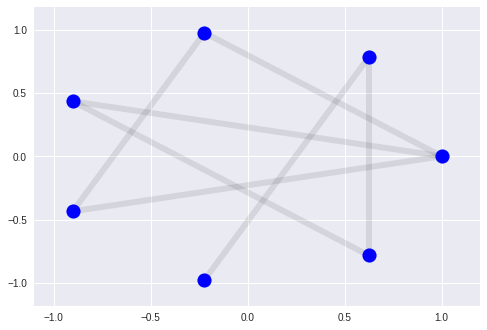

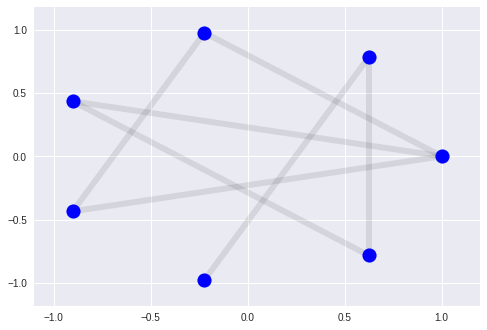

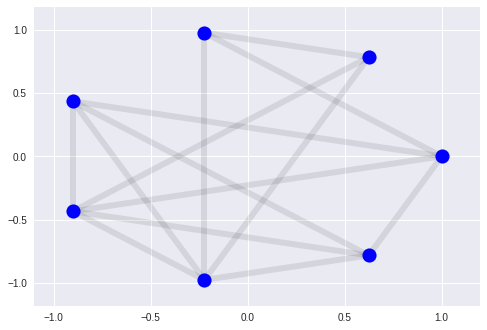

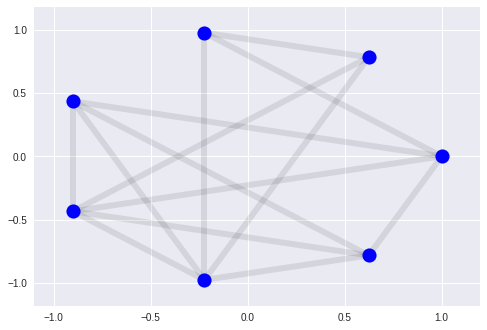

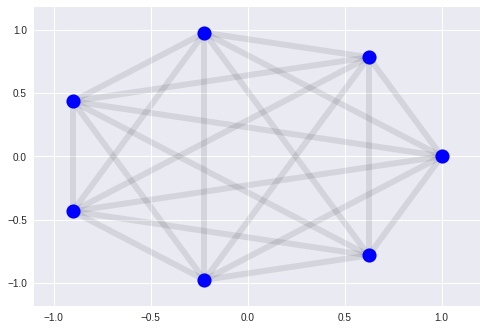

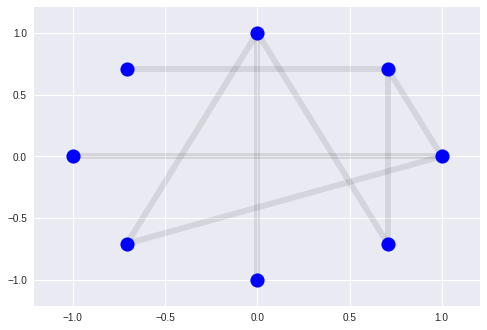

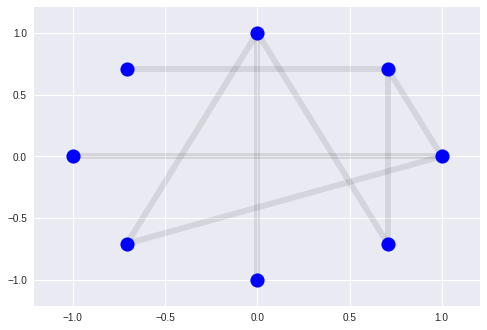

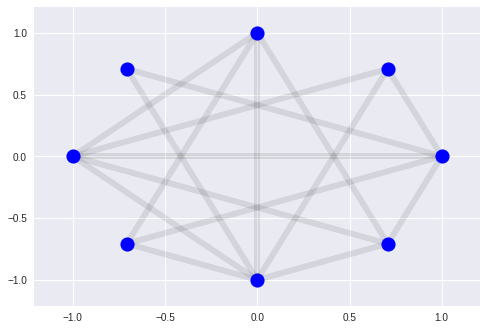

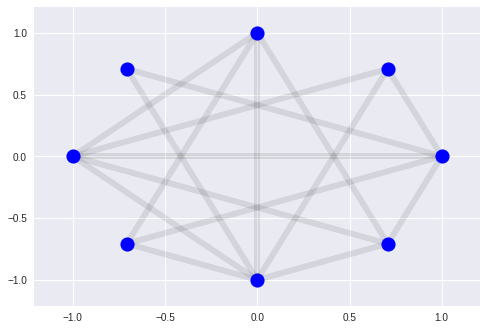

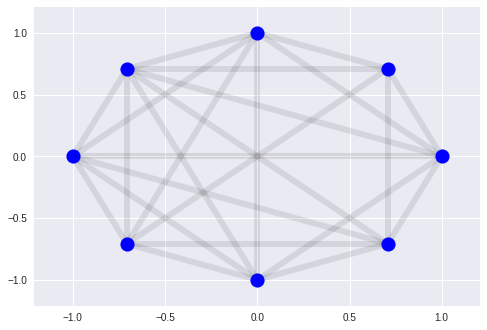

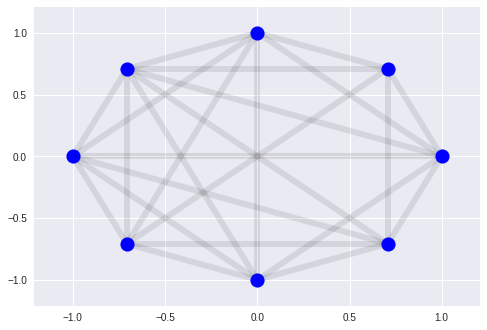

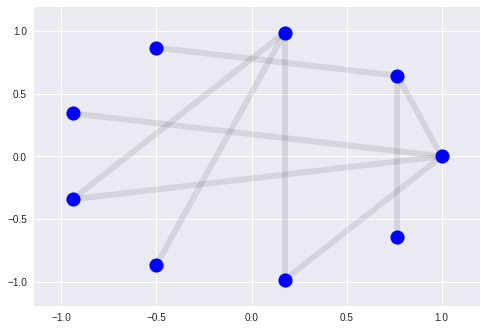

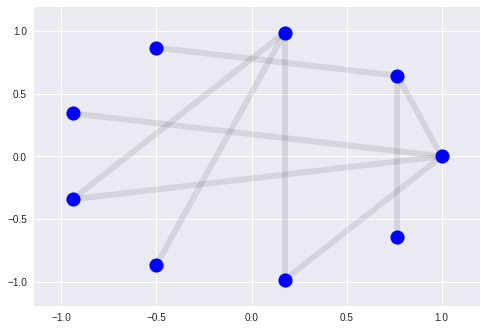

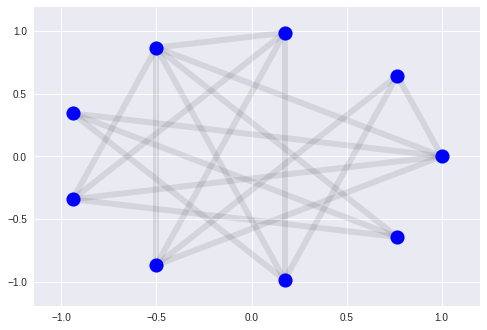

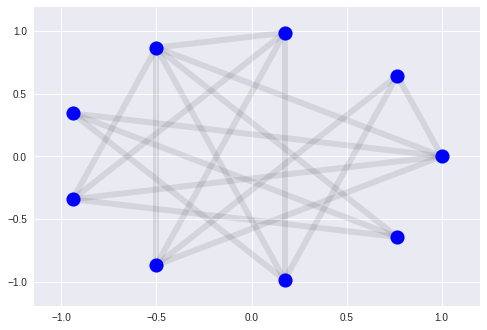

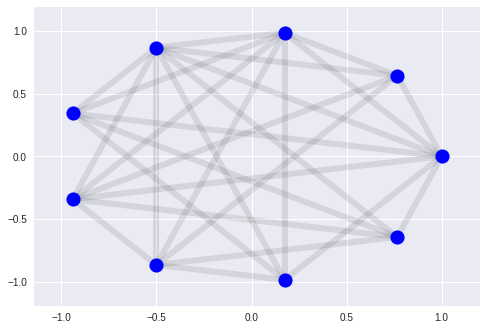

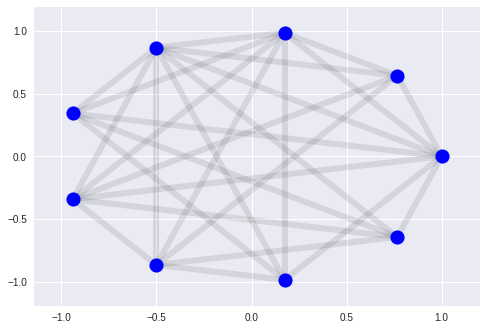

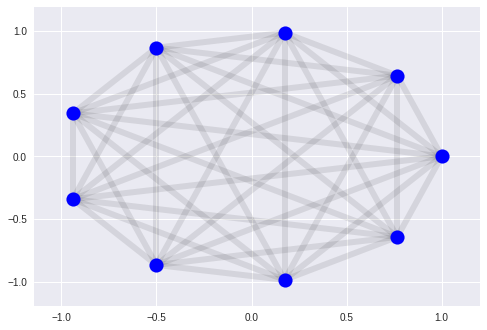

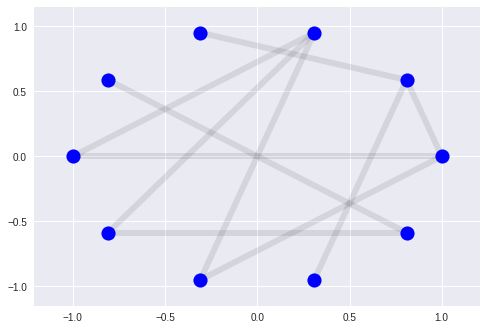

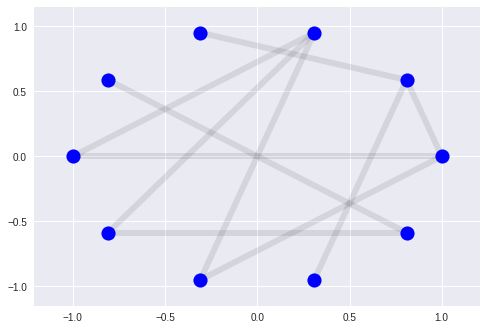

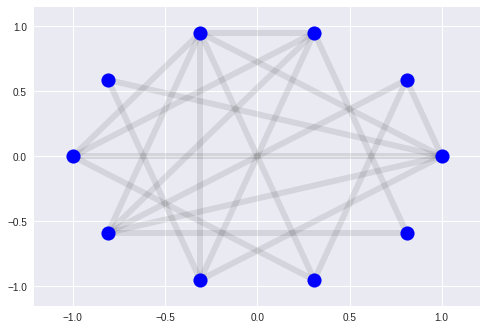

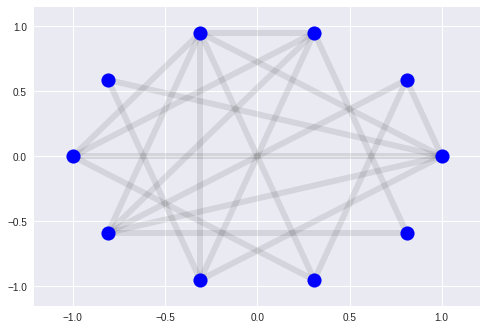

KeyboardInterrupt: 

In [70]:
    for i in small_world.tournament_id.unique():
        # get the nodes
        players = small_world.tournament_size[small_world.tournament_id==i].values[0]
        G = nx.Graph()
        G.add_nodes_from(range(players))

        # get the edges
        edges = []
        for j in small_world.index[small_world.tournament_id==i]:
            neighbors = small_world.neighbors[small_world.tournament_id==i][j].split("|")
            neighbors = map(int, neighbors)
            edges.append([tuple((small_world.player_index[small_world.tournament_id==i][j], k)) for k in neighbors])
        edges = reduce(lambda x,y: x+y,edges)
        G.add_edges_from(edges)
        
        if i%1000 == 0 :
            pos = nx.circular_layout(G)
            nx.draw_networkx_nodes(G,pos,node_size=200,nodelist=G.nodes(), node_color= 'b', node_shape='o')
            nx.draw_networkx_edges(G,pos,alpha=0.09, width=6)
            plt.show()

[0, 1, 2]


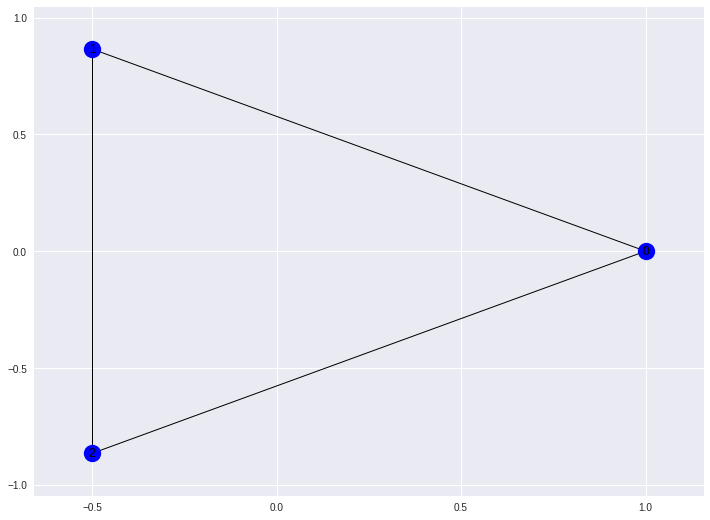

In [81]:
fig2002 = figure(figsize=(12, 9))    
# get the nodes
players = small_world.tournament_size[small_world.tournament_id==1].values[0]
G = nx.Graph()
G.add_nodes_from(range(players))
print(G.nodes())
# get the edges
edges = []
for j in small_world.index[small_world.tournament_id==1]:
    neighbors = small_world.neighbors[small_world.tournament_id==1][j].split("|")
    neighbors = map(int, neighbors)
    edges.append([tuple((small_world.player_index[small_world.tournament_id==1][j], k)) for k in neighbors])
edges = reduce(lambda x,y: x+y,edges)
G.add_edges_from(edges)

pos = nx.circular_layout(G)
scat = nx.draw_networkx(G, pos, node_color='b', widath=2)
plt.show()

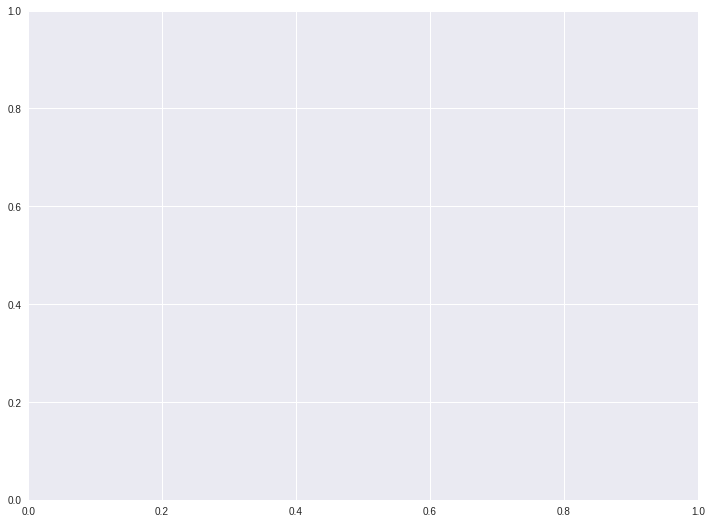

In [82]:
# Create the clean base axes in this cell
figgdp = figure(figsize=(12, 9))
axgdp = figgdp.add_subplot(1, 1, 1)

In [83]:
# Create the initialisation and update functions in this cell
def init_gdp():
    scat.set_offsets([])
    return(scat,)

def update_gdp(frame_number):
    for i in small_world.tournament_id.unique():
        # get the nodes
        players = small_world.tournament_size[small_world.tournament_id==i].values[0]
        G = nx.Graph()
        G.add_nodes_from(range(players))
        print(G.nodes())
        # get the edges
        edges = []
        for j in small_world.index[small_world.tournament_id==i]:
            neighbors = small_world.neighbors[small_world.tournament_id==i][j].split("|")
            neighbors = map(int, neighbors)
            edges.append([tuple((small_world.player_index[small_world.tournament_id==i][j], k)) for k in neighbors])
        edges = reduce(lambda x,y: x+y,edges)
        G.add_edges_from(edges)

        pos = nx.circular_layout(G)
        plot = nx.draw_networkx(G, pos, node_color='b', widath=2)
        scat.set_offsets(plot)

    return(scat,)

In [80]:
# Render the animation in this cell
anim_gdp=animation.FuncAnimation(figgdp, update_gdp, init_func=init_gdp, frames=12, interval=500)
HTML(anim_gdp.to_html5_video())

NameError: name 'scat' is not defined